# Management Summary

# 1. Einleitung

Die Kundenzufriedenheit spielt eine zentrale Rolle in der wettbewerbsintensiven Luftfahrtbranche. Fluggäste erwarten nicht nur eine sichere und pünktliche Beförderung, sondern auch einen exzellenten Service, der ihr Reiseerlebnis positiv beeinflusst. Gerade auf Flugreisen ist die Kundschaft besonders sensibel für die Qualität des angebotenen Services, sei es aufgrund der hohen Ticketpreise oder der unterbewussten Anspannung während des Flugs. Kleine Details im Service können sich summieren und erheblichen Einfluss auf die Wahrnehmung und Zufriedenheit der Passagiere haben. (International, 2014).

Um das Kundenerlebnis systematisch zu optimieren, setzt American Airlines auf Bernard Marrs fünfstufigen Ansatz zur datengetriebenen Entscheidungsfindung. Dieser methodische Ansatz ermöglicht es, fundierte Entscheidungen zu treffen und gezielte Massnahmen zur Verbesserung der Kundenzufriedenheit zu ergreifen. Die vorliegende Arbeit untersucht diesen Prozess detailliert und konzentriert sich dabei auf die ersten vier der fünf Schritte von Marrs (2020):

1.  Ziel und Informationsbedarf definieren (Kapitel 2): Hier werden die Hauptziele festgelegt, die als Grundlage für die weiteren Analysen dienen.
2.  Daten sammeln (Kapitel 3): Dieser Abschnitt behandelt die verschiedenen Aspekte der Datenerhebung, darunter Datenquellen, Datenqualität, Datenbereinigung und Datenmodellierung.
3.  Daten analysieren (Kapitel 4): Die gesammelten und aufbereiteten Daten werden analysiert, um fundierte Erkenntnisse zu gewinnen.
4.  Informationen präsentieren (Kapitel 6): Die Analyseergebnisse werden strukturiert aufbereitet und visualisiert, um eine fundierte Entscheidungsgrundlage zu schaffen.

Der fünfte Schritt, datengestützte Entscheidungen treffen, wird in dieser Arbeit nicht umgesetzt, da er nicht Teil der Aufgabenstellung ist.


# 2. Ziel und Informationsbedarf definieren

American Airlines verfolgt das Ziel, die Kundenzufriedenheit kontinuierlich zu verbessern, um sich im hart umkämpften Luftverkehrsmarkt erfolgreich zu behaupten. Dazu ist es notwendig, die wesentlichen Einflussfaktoren zu identifizieren, die das Reiseerlebnis der Passagiere positiv oder negativ beeinflussen. Ein datenbasierter Ansatz ermöglicht es, fundierte Entscheidungen zur Optimierung des Services und der betrieblichen Abläufe zu treffen.

Im Rahmen dieser Projektarbeit sollen daher folgende zentrale Fragen untersucht werden:

1.  Welche Faktoren haben den grössten Einfluss auf die Kundenzufriedenheit bei der American Airline im Luftverkehr?
2.  Welche Faktoren beeinflussen Flugverspätungen bei der American Airline am meisten?
3.  Wie variieren Passagieraufkommen und Flugverkehr bei der American Airlines über Zeit und Regionen hinweg, und welche Auswirkungen hat dies auf die Kundenzufriedenheit?

# 3. Daten sammeln
Eine systematische und strukturierte Datensammlung ist der Grundstein für die spätere Analyse und Entscheidungsfindung. Im folgenden Kapitel werden die verschiedenen Aspekte des Datenbeschaffungsprozesses behandelt.

## 3.1 Datenquellen
Die Fluggesellschaft möchte die Faktoren verstehen, die die Kundenzufriedenheit beeinflussen, und Strategien identifizieren, um das Kundenerlebnis zu verbessern. Leider gibt American Airlines keine konkreten Zahlen zu Kundenumfragen oder anderen relevanten Statistiken heraus. Aus diesem Grund bedient sich die Projektgruppe öffentlich zugänglicher, anonymisierter Daten von Kaggle, einer Plattform, die über 50.000 Datensätze zu verschiedensten Themen bietet (Kaggle, o. J.). Die Projektgruppe nutzt diese anonymisierten Datensätze gezielt und wendet sie auf American Airlines an, um daraus relevante Erkenntnisse abzuleiten.

Die Projektgruppe arbeitet mit den folgenden Datenquellen:

- Kundenzufriedenheitsumfrage XX (Annahme, dass diese Umfrage von American Airlines durchgeführt wurde) QUELLE
- Flugverspätungen: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay/code
- Grösste Flughäfen nach Passagieraufkommen zwischen 2016 und 2020: https://www.kaggle.com/datasets/khaiid/most-crowded-airports
- XX (weitere relevante Datensätze, die später spezifiziert werden) QUELLE

## 3.2 Datenqualität und -bereinigung

**Kundenzufriedenheitsumfrage**

Um datenbasierte Erkenntnisse über die Zufriedenheit der Passagiere zu gewinnen wurde der Datensatz "Invistico_Airline" geladen. Ein Ziel der Analyse ist es, die wichtigsten Einflussfaktoren auf die Kundenzufriedenheit zu identifizieren, und daraus konkrete Optimierungsmaßnahmen für die Airline abzuleiten. Der genannte Datensatz enthält dabei über 100000 Kundenbewertungen mit Informationen zur:  
- Demografie (Alter, Geschlecht, Kundentyp)
- Reiseeigenschaften (Flugdistanz, Buchungsklasse, Reisezweck)
- Servicebewertung (z. B. WLAN, Sitzkomfort, Online-Buchung, Essen & Trinken)
- Pünktlichkeit (Verspätungen bei Abflug und Ankunft)
- Zufriedenheit (binäre Zielvariable: zufrieden vs. unzufrieden)



In [2]:
# Datensatz "Airlines Delay" von Kaggle herunterladen
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Invistico_Airline.csv"

# Die letzte Version des Datensatzes laden
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sjleshrac/airlines-customer-satisfaction",
  file_path,
)

<ipython-input-2-0c2a28e91605>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


Bevor mit der eigentlichen Analyse begonnen werden konnte, wurden die Daten sorgfältig bereinigt und vorbereitet. Dies geschah damit die Ergebnisse möglichst zuverlässige und aussagekräftige sind. So wurden zuerst geprüft ob mögliche Fehlende Werte im Datensatz vorhanden waren, damit diese entfernt werden können.

In [3]:
# Fehlende Werte analysieren
print(df.isnull().sum())

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


Da es 393 leere Werte in der Spalte "Arrival Delay in Minutes" gab wurden diese Zeilen gedropt.

In [ ]:
df = df.dropna()

Im nächsten Schritt wurden verschiedene Spalten umkodiert. So wurde die Zielvariable "Satisfaction" in binäre Werte umgewandelt. Der Wert "satisfied" wurde zur "1" umgewandelt und der Wert "dissatisfied" wurde zur "0".

In [ ]:
# Umwandlung der Zielvariable ("Satisfaction") in binäre Werte
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "dissatisfied": 0})

Im nächsten Schritt fand das Umwandeln (Encodieren) von kategorischen Variablen in numerische statt. Dies geschah, damit sie gut für die Analyse verwendet werden können.

In [ ]:
# Kategorische Variablen in numerische Werte umwandeln
categorical_cols = ["Gender", "Customer Type", "Type of Travel", "Class"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Flugverspätungen**

Für eine zielgerichtete Analyse der Flugverspätungen wurde zunächst der Datensatz "Airlines Delay" von Kaggle geladen. Die Daten enthalten Informationen zu verschiedenen Fluggesellschaften und deren Verbindungen. Zur Fokussierung auf eine homogene Datenbasis wurden ausschliesslich Flüge der Fluggesellschaft American Airlines (AA) berücksichtigt. Alle anderen Einträge wurden aus dem Datensatz entfernt, um Verzerrungen durch unterschiedliche Betriebsmodelle der Airlines zu vermeiden.

In [ ]:
# Datensatz "Airlines Delay" von Kaggle herunterladen
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "airlines_delay.csv"

# Die letzte Version des Datensatzes laden
df_airlines_delay = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ulrikthygepedersen/airlines-delay",
  file_path,
)

In [ ]:
# Lösche alle Zeilen, die nicht AA in Airline haben

df_airlines_delay = df_airlines_delay[df_airlines_delay['Airline'] == 'AA']
df_airlines_delay['Airline'].unique()

array(['AA'], dtype=object)

Im nächsten Schritt wurde die Qualität der Daten überprüft. Dabei zeigte sich, dass keine fehlenden Werte vorhanden waren, was auf eine hohe Vollständigkeit der Daten hinweist. Um Redundanzen zu vermeiden, wurden zusätzlich doppelte Einträge identifiziert und gelöscht - ingesamt 26760 Einträge.

In [ ]:
# Fehlende Werte analysieren
print(df_airlines_delay.isnull().sum())

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64


In [ ]:
# Suche nach doppelten Zeilen und lösche diese
print(df_airlines_delay.duplicated().sum())
df_airlines_delay.drop_duplicates(inplace=True)

26760


Ein Blick auf die Datentypen der einzelnen Spalten stellte sicher, dass alle Informationen korrekt formatiert waren, etwa Zahlenwerte als numerische Typen und Flughafencodes als Zeichenketten.

In [ ]:
# Zeige die Datentypen aller Spalten an
print(df_airlines_delay.dtypes)

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object


Zur Ergänzung der Daten wurde ein zweiter Datensatz mit den passagierstärksten Flughäfen weltweit (Zeitraum 2016–2020) integriert. Dieser enthielt unter anderem die IATA-Codes sowie die Anzahl der Passagiere pro Flughafen und Jahr. Über eine Extraktion der IATA-Codes aus dem kombinierten Spaltenfeld `Code`
konnten diese mit den Abflug- und Ankunftsorten (`AirportFrom`, `AirportTo`) der American-Airlines-Flüge verknüpft werden.

In [ ]:
# Datensatz "Most Crowded Airports" von Kaggle herunterladen
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "airports.csv"

# Die letzte Version laden
df_crowded_airports = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "khaiid/most-crowded-airports",
    file_path,
)

<ipython-input-36-05facf99f678>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df_crowded_airports = kagglehub.load_dataset(


In [ ]:
# Extraktion der IATA- und ICAO-Codes
df_crowded_airports[['IATA', 'ICAO']] = df_crowded_airports['Code'].str.split('/', n=1, expand=True)

Im Zuge der Verknüpfung wurden zwei neue Spalten ergänzt:

*   `AirportFromCrowd`: Passagieraufkommen am Abflughafen
*   `AirportToCrowd`: Passagieraufkommen am Ankunftsflughafen

So lässt sich künftig analysieren, ob ein Zusammenhang zwischen dem Verkehrsaufkommen eines Flughafens und der Wahrscheinlichkeit für Verspätungen besteht.

In [ ]:
# Merge "Passenger" für "AirportFrom"
merged_df_from = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportFrom', right_on='IATA', how='left')
df_airlines_delay['AirportFromCrowd'] = merged_df_from['Passengers']

# Merge "Passenger" für "AirportTo"
merged_df_to = pd.merge(df_airlines_delay, df_crowded_airports[['IATA', 'Passengers']], left_on='AirportTo', right_on='IATA', how='left')
df_airlines_delay['AirportToCrowd'] = merged_df_to['Passengers']

print("First 5 records:", df_airlines_delay.head())

First 5 records:     Flight    Time  Length Airline AirportFrom AirportTo  DayOfWeek  Class  \
7   1300.0  1210.0    80.0      AA         DFW       MEM          3      0   
89   550.0  1030.0   150.0      AA         LAS       DFW          7      0   
92  1827.0  1030.0   225.0      AA         DFW       SMF          1      0   
94   655.0   540.0   250.0      AA         JFK       STT          6      0   
99  1822.0   875.0   130.0      AA         DFW       DAY          7      0   

    AirportFromCrowd  AirportToCrowd  
7         48566803.0             NaN  
89        61623756.0             NaN  
92               NaN      69112607.0  
94               NaN      65670697.0  
99        53099282.0      58813103.0  


Abschliessend wurde noch überprüft, wie viele unterschiedliche Werte in den Spalten vorhanden sind. Dabei wurde sichtbar, dass nicht für alle Flughäfen Informationen zum Passagieraufkommen vorliegen. Diese Lücken können auf Flughäfen zurückzuführen sein, die nicht zu den grössten weltweit zählen oder im Zeitraum der Erhebung nicht erfasst wurden. Ein möglicher Umgang damit wäre entweder die Imputation fehlender Werte, das Einholen zusätzlicher Daten oder die gezielte Einschränkung der Analyse auf vollständig verknüpfte Datensätze.

In [ ]:
# Berechne die Anzahl der eindeutigen Werte pro Spalte
unique_counts = df_airlines_delay.nunique()
print(unique_counts)

#ACHTUNG HIER FEHLEN VIELE FLUGHAFEN - wie sollen wir das machen?

Flight              1281
Time                 229
Length                98
Airline                1
AirportFrom           78
AirportTo             78
DayOfWeek              7
Class                  2
AirportFromCrowd      75
AirportToCrowd        76
dtype: int64


## 3.4 Datenmodellierung

# 4 Daten analysieren
Im Zentrum der Datenanalyse stehen "Descriptive", "Diagnostic" und "Predictive Analytics" im Vordergrund.
Die beschreibende Analyse bezieht sich hauptsächlich die Analyse historischer Daten, um vergangene Ereignisse zu verstehen. Ziel ist es Muster und Trends in den Daten zu identifizieren. Übliche Methoden sind Mittelwerte, Standardabweichungen, minimale und maximale Werte, Korrelationen und Kreuztabellen. Für die Visualisierung werden Dashboards und Diagramme oder sogenannte Heatmaps erstellt. Mit "Diagnostic Analytics" wird einen Schritt weiter gegangen und versucht die Ursachen für bestimmte Ereignisse oder Trends zu identifizieren. Hierbei werden zusätzliche Techniken wie sogenannte "Drill-Down-Analysen", Korrelationen und Hypothesentests durchgeführt.
"Predictive Analytics" nutzt historische Daten und statistische Modelle, um zukünftige Ereignisse vorherzusagen. Dabei werden Instrumente wie maschinelles Lernen, Regressionsmodelle und Zeitreihenanalysen durchgeführt (Rashedi, 2024).

## 4.1 Analysen und Erkenntnisse

Fragestellung: Gibt es bestimmte Wochentage oder Tageszeiten mit besonders vielen Verspätungen? Sind Wochenendflüge pünktlicher als Flüge unter der Woche?


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kopie für Sicherheit
df = df_airlines_delay.copy()

# Schritt 1: Stunde aus der Spalte "Time" berechnen
df["Hour"] = df["Time"] // 100  # z.B. 1345 → 13

# Schritt 2: Tageszeit-Kategorie erstellen
def get_daypart(hour):
    if pd.isnull(hour):
        return "Unbekannt"
    elif 5 <= hour < 12:
        return "Morgens"
    elif 12 <= hour < 17:
        return "Mittags"
    elif 17 <= hour < 21:
        return "Abends"
    else:
        return "Nachts"

df["Tageszeit"] = df["Hour"].apply(get_daypart)

# Schritt 3: Wochentag benennen (statt 1–7 → Namen)
wochentage = {
    1: "Montag", 2: "Dienstag", 3: "Mittwoch", 4: "Donnerstag",
    5: "Freitag", 6: "Samstag", 7: "Sonntag"
}
df["Wochentag"] = df["DayOfWeek"].map(wochentage)

# Schritt 4: Pivot-Tabelle: Ø Verspätungsrate (Class = 1)
heatmap_data = df.pivot_table(
    index="Wochentag",
    columns="Tageszeit",
    values="Class",
    aggfunc="mean"
)

# Reihenfolge der Wochentage für Darstellung
reihenfolge = ["Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag"]
heatmap_data = heatmap_data.reindex(reihenfolge)

# **Änderung hier:** Reihenfolge der Tageszeiten festlegen
heatmap_data = heatmap_data[["Morgens", "Mittags", "Nachts"]]

# Schritt 5: Heatmap visualisieren
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
plt.title("Verspätungsrate nach Wochentag und Tageszeit")
plt.xlabel("Tageszeit")
plt.ylabel("Wochentag")
plt.tight_layout()
plt.show()

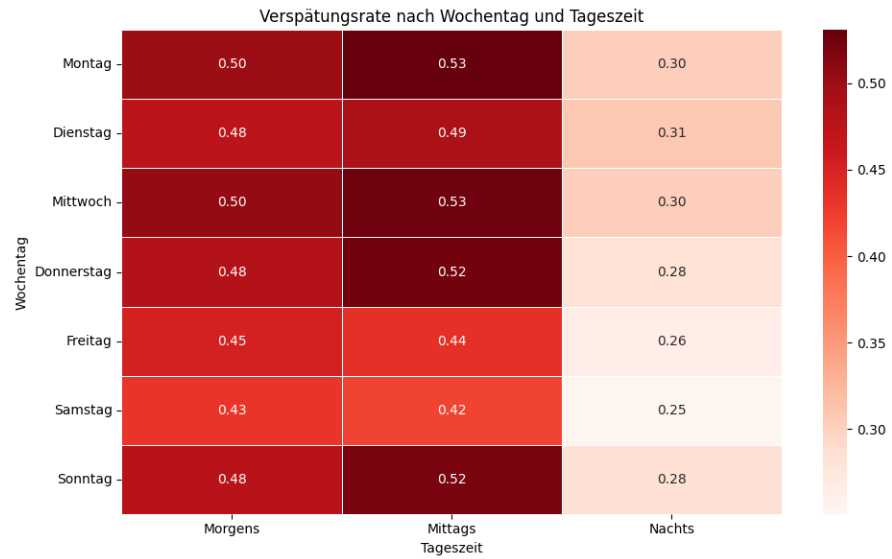

*   Anfangs Woche und die Flüge um die Mittagszeit sind öfters verspätet
*   Samstags sind Flüge grundsätzlich pünktlicher als unter der Woche

Fragestellung: Gibt es bestimmte Abflug- oder Ankunft-Flughafen, die besonders oft Verspätungen bei der American Airline verursachen?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kopie des AA-Datensatzes
df = df_airlines_delay.copy()

# Gruppieren nach Abflughafen (AirportFrom), Ø Verspätungsrate berechnen
abflug_delay = df.groupby("AirportFrom")["Class"].mean().sort_values(ascending=False)

# Top 10 Abflughäfen mit höchster Verspätungsrate
plt.figure(figsize=(12, 6))
sns.barplot(x=abflug_delay.head(10).index, y=abflug_delay.head(10).values, palette="Reds_r")
plt.title("Top 10 Abflughäfen mit höchster Verspätungsrate bei AA")
plt.xlabel("Abflughafen")
plt.ylabel("Ø Verspätungsrate (0 = pünktlich, 1 = verspätet)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

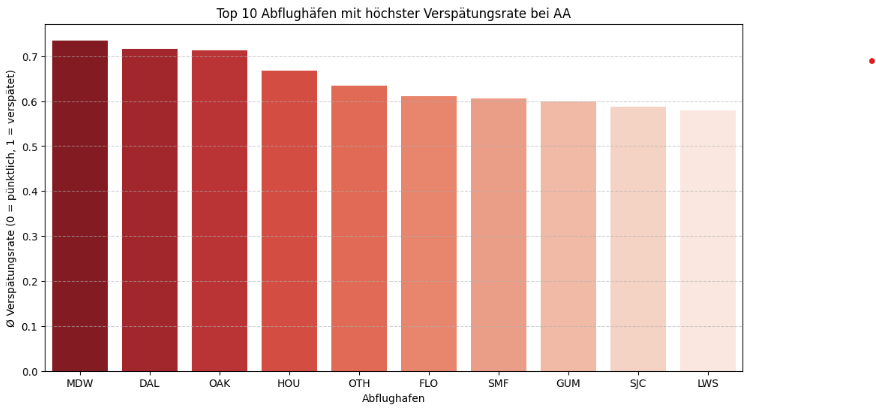

*   MDW-Chicago Midway Airport ist der Abflughafen mit der grössten Verspätungsrate bei der American Airline
*   Nach den Flughäfen DAL-Dallas Love Field und OAK-Oakland Airport sinkt die Verpätungsrate kontinuerlich ab

In [ ]:
# Gruppieren nach Ankunftsflughafen (AirportTo), Ø Verspätungsrate berechnen
ankunft_delay = df.groupby("AirportTo")["Class"].mean().sort_values(ascending=False)

# Top 10 Ankunftsflughäfen mit höchster Verspätungsrate
plt.figure(figsize=(12, 6))
sns.barplot(x=ankunft_delay.head(10).index, y=ankunft_delay.head(10).values, palette="Blues_r")
plt.title("Top 10 Ankunftsflughäfen mit höchster Verspätungsrate bei AA")
plt.xlabel("Ankunftsflughafen")
plt.ylabel("Ø Verspätungsrate (0 = pünktlich, 1 = verspätet)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

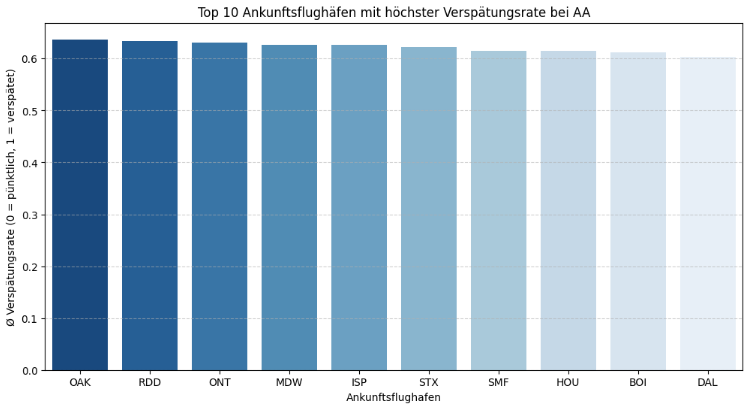

*   OAK-Flughafen Oakland hat die höchste Verspätungsrate bei den Ankunftsflughäfen der American Airline
*   RDD-Redding Regional Airport und der ONT-Ontario Airport sind nur bei den Ankunftsflughäfen unter den Top 10 der Flughäfen mit den höchsten Verspätungsraten

# Literaturverzeichnis
Interanational, B. (2014, Dezember 11). *Airline Customer Experience*. B2B International. https://www.b2binternational.de/airline-customer-experience-ein-lacheln-kostet-nichts/)

Kaggle. (o. J.). Kaggle: Your Machine Learning and Data Science Community. Abgerufen am 31. März 2024, von https://www.kaggle.com/

Marr, B. (2020). From data to decisions: A five-step approach to data-driven decision-making. CPA Management Accounting Guideline.

Rashedi, J. (2024). Customer Analytics. In J. Rashedi, Customer Insights (S. 65–97). Springer Fachmedien Wiesbaden. https://doi.org/10.1007/978-3-658-43392-5_5



 Top 5 Rows
Age
0    65
1    47
2    15
3    60
4    70
Name: Age, dtype: int64

 Jeweiliger Datentyp pro Spalte
satisfaction                          object
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                    

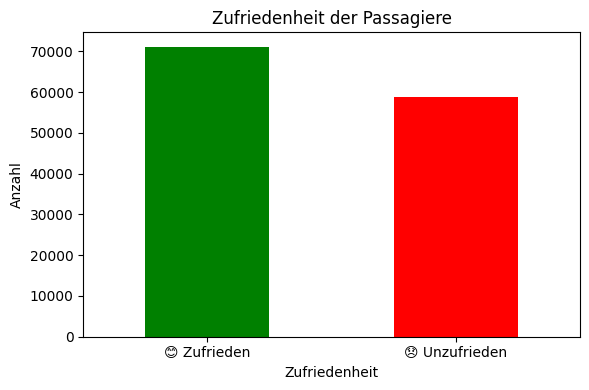

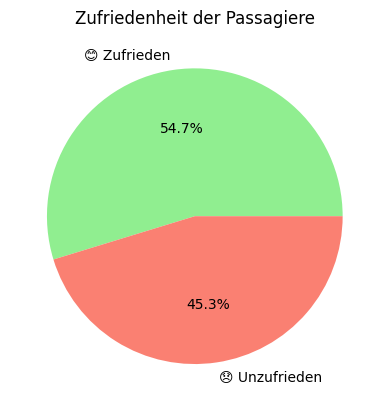

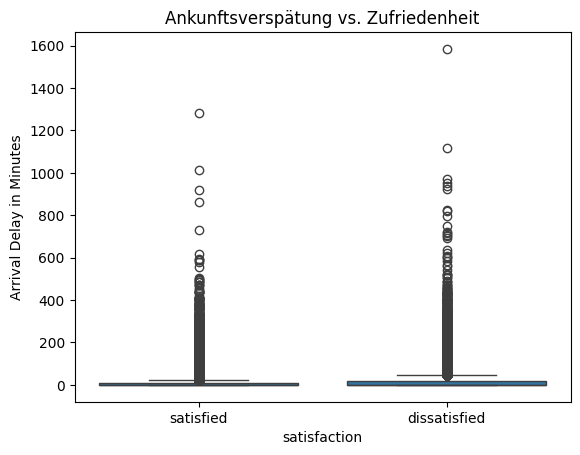

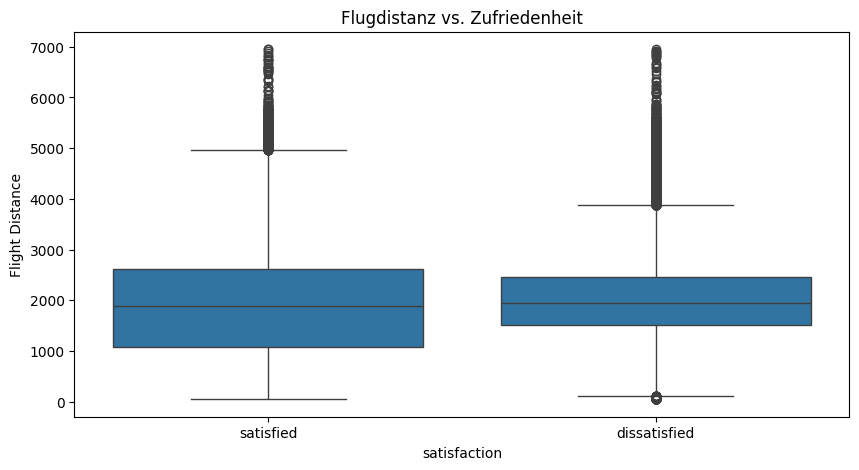

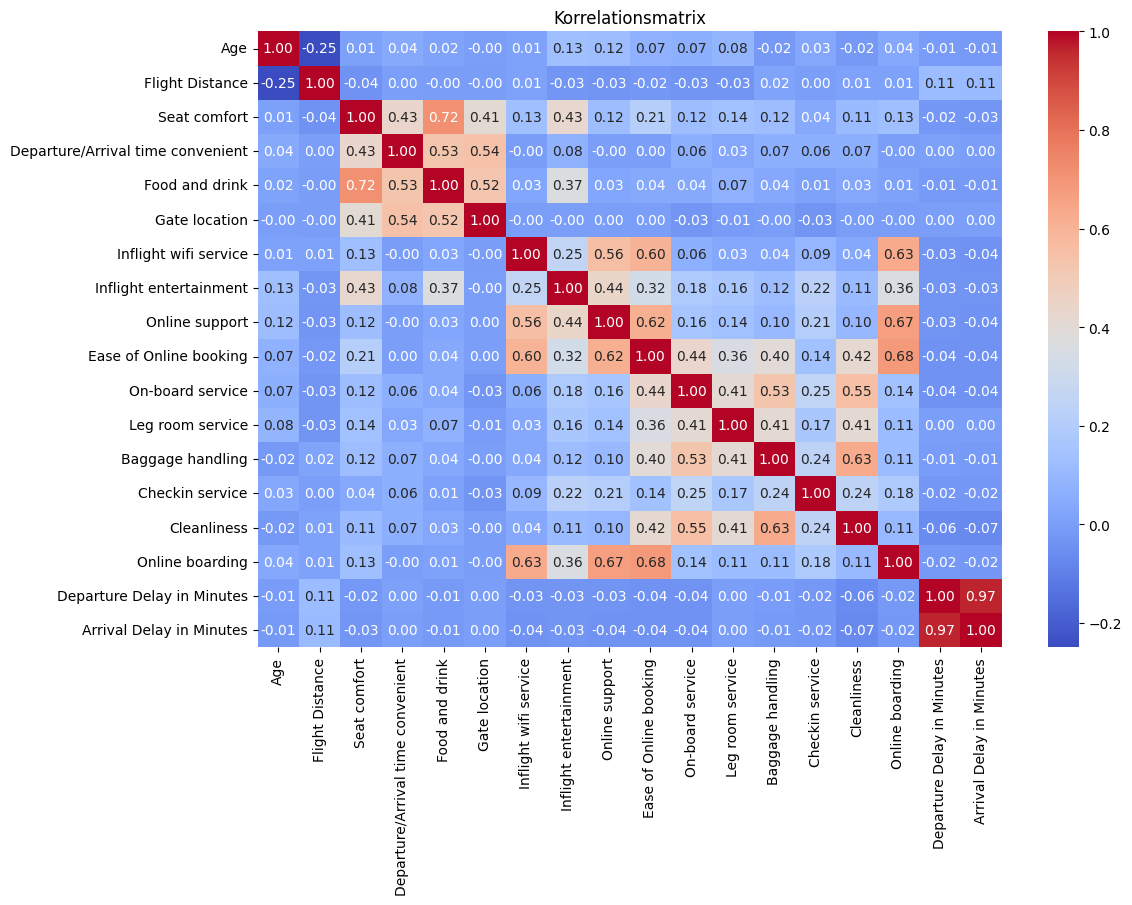

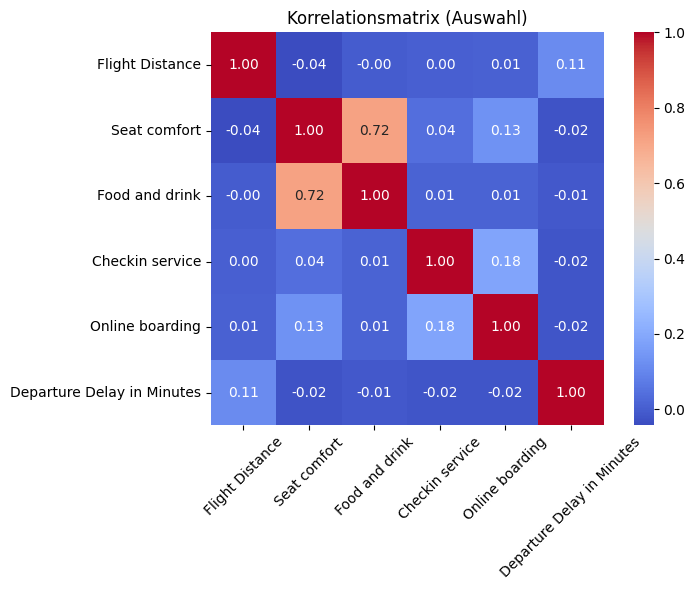

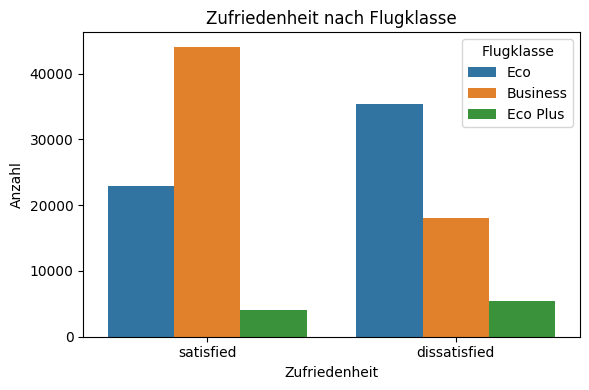

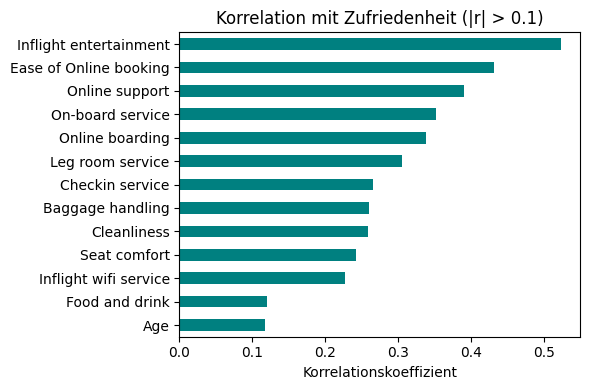

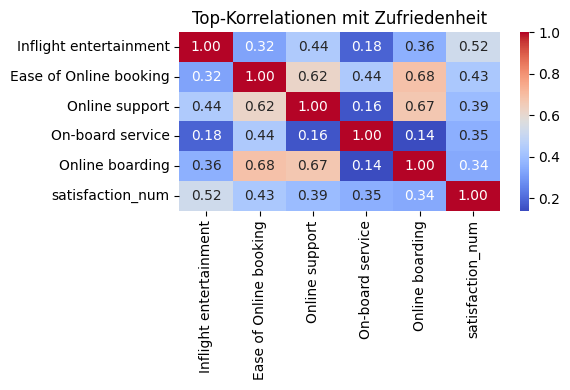

['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction_num']

 Accuracy: 1.0

 Confusion Matrix:
[[11821     0]
 [    0 14077]]

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11821
           1       1.00      1.00      1.00     14077

    accuracy                           1.00     25898
   macro avg       1.00      1.00      1.00     25898
weighted avg       1.00      1.00      1.00     25898

Vorhersage für hypothetischen Passagier: Unzufrieden


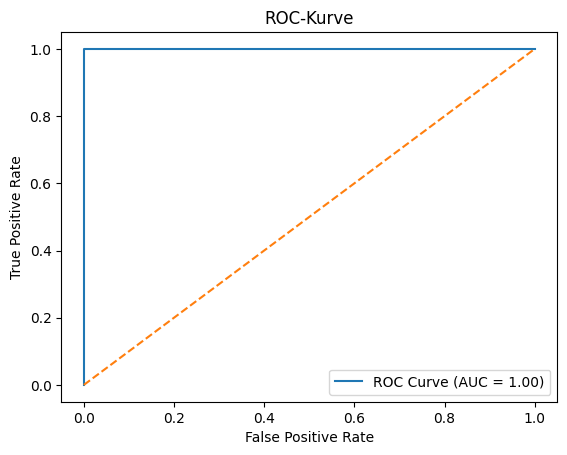

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

# Einlesen via Pandas(pd) und einem CSV
df = pd.read_csv("Invistico_Airline.csv")
print("\n Top 5 Rows")
#print(df.head())  # Top 5 jeder Spalte des Datensets
print("Age")
print(df['Age'].head()) # Einschränkung für gewünschte Spalte möglich

# In einem ersten Schritt sichten wir unsere Daten, damit wir ein Gesamtbild haben und erste Richtungen für die detaillierte Analyse definieren können.
# Welche Spalte hält welchen Datentyp
print("\n Jeweiliger Datentyp pro Spalte")
print(df.dtypes)
# print(df['Age'].dtypes) # Einschränkung für gewünschte Spalte möglich

# Einzigartige Werte pro Spalte
print("\n Anzahl einzigartiger Werte pro Spalte (Unique)")
print(df.nunique())
# print(df['Age'].nunique()) # Einschränkung für gewünschte Spalte möglich

# Fehlende Werte im Datensatz erkennen
print("\n Spalten:", df.columns.tolist())
print("\n Fehlende Werte pro Spalte:")
print(df.isnull().sum())

# Statistische Übersicht über numerische Spalten
print("\n Statistische Kennzahlen für den jeweiligen Parameter")
print("count: Anzahl der Nicht-NaN-Werte")
print("mean: Mittelwert")
print("std: Standardabweichung")
print("min: Minimum")
print("25%: 1. Quartil")
print("50%: Median")
print("75%: 3. Quartil")
print("max: Maximum")
#Ausführen
print(df.describe())
# print(df['Age'].describe()) # Einschränkung für gewünschte nummerische Spalte möglich

# Verteilung bestimmter wichtiger Spalten ansehen
print("\n Verteilung gewisser definierter Parameter")
print(df['Age'].value_counts().sort_index()) #Age
print(df['Gender'].value_counts().sort_index()) #Gender

# Korrelationen zwischen numerischen Variablen
# Korrelation drückt sich folgendermasse aus:
# Beispiel mit Age
# 0.80 bei Alter und Arbeitsjahre: Starker positiver Zusammenhang – je älter, desto mehr Arbeitsjahre.
# 0.65 bei Alter und Gehalt: Mäßig positiver Zusammenhang – älter = tendenziell höheres Gehalt.
print("\n Korrelationsmatrix (numerisch):")
# print(df.corr(numeric_only=True)) # Korrelation aller Parameter
print(df[["Flight Distance", "Seat comfort", "Food and drink"]].corr(numeric_only=True)) # Korrelation spezifischer Parameter
print(df[["Checkin service", "Online boarding", "Departure Delay in Minutes"]].corr(numeric_only=True)) # Korrelation spezifischer Parameter

# Verhältnis von Zufriedenheit zu anderen Merkmalen (Beispiel)
print("\n Zufriedenheit nach Geschlecht")
print(df.groupby('Gender')['satisfaction'].value_counts(normalize=True))

# Duplikate prüfen von Datensatz
print("\n Anzahl Duplikate")
print(df.duplicated().sum())

# Visualisierung Zufriedenheit

# Zufriedenheitskategorien umbenennen
df['satisfaction_label'] = df['satisfaction'].map({
    'satisfied': '😊 Zufrieden',
    'dissatisfied': '😞 Unzufrieden'
})

# Anzeige Zufriedenheitsverteilung
plt.figure(figsize=(6,4))
df['satisfaction_label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Zufriedenheit der Passagiere")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Kreisdiagramm
df['satisfaction_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'salmon'],
    ylabel='',
    title="Zufriedenheit der Passagiere"
)
plt.show()

# Zufriedenheit Boxplot
sns.boxplot(data=df, x="satisfaction", y="Arrival Delay in Minutes")
plt.title("Ankunftsverspätung vs. Zufriedenheit")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="satisfaction", y="Flight Distance", data=df)
plt.title("Flugdistanz vs. Zufriedenheit")
plt.show()

# Heatmap der numerischen Korrelationen
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatrix")
plt.show()


# Vergleich einzelner ausgewählter Parameter
selected_cols = ['Flight Distance', 'Seat comfort', 'Food and drink', 'Checkin service', 'Online boarding', 'Departure Delay in Minutes']
corr_matrix = df[selected_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Korrelationsmatrix (Auswahl)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='satisfaction', hue='Class')
plt.title("Zufriedenheit nach Flugklasse")
plt.xlabel("Zufriedenheit")
plt.ylabel("Anzahl")
plt.legend(title='Flugklasse')
plt.tight_layout()
plt.show()

df['satisfaction_num'] = df['satisfaction'].map({
    'satisfied': 1,
    'dissatisfied': 0
})

# Nur numerische Features mit Korrelation zur Zufriedenheit (nur absolute Werte > 0.1 anzeigen)
corr_matrix = df.select_dtypes(include='number').corr()
satisfaction_corr = corr_matrix['satisfaction_num'].drop('satisfaction_num')
satisfaction_corr = satisfaction_corr[abs(satisfaction_corr) > 0.1].sort_values()

plt.figure(figsize=(6, 4))
satisfaction_corr.plot(kind='barh', color='teal')
plt.title("Korrelation mit Zufriedenheit (|r| > 0.1)")
plt.xlabel("Korrelationskoeffizient")
plt.tight_layout()
plt.show()

top_corr_features = satisfaction_corr.abs().sort_values(ascending=False).head(5).index.tolist()
selected_features = top_corr_features + ['satisfaction_num']

plt.figure(figsize=(6, 4))
sns.heatmap(df[selected_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Top-Korrelationen mit Zufriedenheit")
plt.tight_layout()
plt.show()
print(corr_matrix.columns.tolist())

# Machine Learning

# Vorbereitung: Nur numerische + sinnvoll gewandelte Features nutzen
# Beispiel: einfache Vorverarbeitung
from sklearn.preprocessing import LabelEncoder

# Kopie des Datensatzes
X = df.copy()

# Zielvariable encodieren
y = LabelEncoder().fit_transform(X['satisfaction_num'])
X = X.drop(columns=['satisfaction_num'])

# Kategorische Features codieren
X = pd.get_dummies(X, drop_first=True)

# Sofortlösung: Fehlende Werte entfernen
X = X.dropna()
y = y[X.index]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Klassifikator trainieren
model = LogisticRegression(max_iter=15000)
model.fit(X_train, y_train)

# Vorhersage & Bewertung
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

neuer_passagier = pd.DataFrame({
    'Gender': ['Male'],
    'Customer Type': ['Loyal Customer'],
    'Age': [45],
    'Type of Travel': ['Business travel'],
    'Class': ['Business'],
    'Flight Distance': [750],
    'Inflight wifi service': [4],
    'Departure Delay in Minutes': [0],
    'Arrival Delay in Minutes': [5],
    # ... alle anderen Features hier ergänzen ...
})

# Umwandeln wie Trainingsdaten
neuer_passagier_encoded = pd.get_dummies(neuer_passagier)
# Fehlende Spalten auffüllen (die im Modell vorhanden waren)
neuer_passagier_encoded = neuer_passagier_encoded.reindex(columns=X.columns, fill_value=0)

# Vorhersage
vorhersage = model.predict(neuer_passagier_encoded)
print("Vorhersage für hypothetischen Passagier:", "Zufrieden" if vorhersage[0] == 1 else "Unzufrieden")

y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-Kurve")
plt.legend()
plt.show()
